In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
file_name_sparse = os.path.join("csv","Sparse","result_sparse.csv")
file_name_uniform = os.path.join("csv","Uniform","result_uniform.csv")


In [23]:
# Load CSV file as pandas DataFrame
df_sparse = pd.read_csv(file_name_sparse)
df_uniform = pd.read_csv(file_name_uniform)


# frames = [df1, df_200]
# df = pd.concat(frames)

In [24]:
df_uniform

,FD graph,TPR Sensitivity,TNR Specificity,PPV Precision,NPV Negative Precision
0,../../../Data/jpg/jpg_fd_files/Uniform/FR/n=20...,0.689189,0.452381,0.425000,0.712500
1,../../../Data/jpg/jpg_fd_files/Uniform/KK/n=20...,0.727273,0.448276,0.333333,0.812500
2,../../../Data/jpg/jpg_fd_files/Uniform/FA2/n=2...,0.614907,0.461538,0.825000,0.225000
3,../../../Data/jpg/jpg_fd_files/Uniform/JIGGLE/...,0.611842,0.437500,0.775000,0.262500
4,../../../Data/jpg/jpg_fd_files/Uniform/FR/n=20...,0.541176,0.808696,0.676471,0.704545
...,...,...,...,...,...
95,../../../Data/jpg/jpg_fd_files/Uniform/JIGGLE/...,0.140228,0.993007,0.924855,0.652989
96,../../../Data/jpg/jpg_fd_files/Uniform/FR/n=30...,0.071466,0.998177,0.985507,0.382600
97,../../../Data/jpg/jpg_fd_files/Uniform/KK/n=30...,0.334247,0.993928,0.884058,0.915094
98,../../../Data/jpg/jpg_fd_files/Uniform/FA2/n=3...,0.095378,0.995113,0.942029,0.569182


In [25]:
def df_split(df):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'TPR_Sensitivity', 'TNR_Specificity','PPV_Precision', 'NPV_Negative_Precision'])
    for filename in df['FD graph']:
        new_name = filename.replace("../../../Data/jpg/jpg_fd_files/","")
        name_list = new_name.split('/')
        prop_list = name_list[-1].split('=')
        node_number = prop_list[1].replace('d','')
        if "_" in prop_list[2]:
            degree = prop_list[2].split("_")[0]
        else:
            degree = prop_list[2].replace(".jpg","")
        tpr = df.loc[df['FD graph'] == filename, 'TPR Sensitivity'].values[0]
        tnr = df.loc[df['FD graph'] == filename, 'TNR Specificity'].values[0]
        ppv = df.loc[df['FD graph'] == filename, 'PPV Precision'].values[0]
        npv = df.loc[df['FD graph'] == filename, 'NPV Negative Precision'].values[0]
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, tpr, tnr, ppv, npv]
    return df_result



In [26]:
df_sparse_splitted = df_split(df_sparse)
df_uniform_splitted = df_split(df_uniform)


In [27]:
df_uniform_splitted

,Type,FD_Algorithm,Nodes_Number,Degree,TPR_Sensitivity,TNR_Specificity,PPV_Precision,NPV_Negative_Precision
0,Uniform,FR,200,6,0.689189,0.452381,0.425000,0.712500
1,Uniform,KK,200,6,0.727273,0.448276,0.333333,0.812500
2,Uniform,FA2,200,6,0.614907,0.461538,0.825000,0.225000
3,Uniform,JIGGLE,200,6,0.611842,0.437500,0.775000,0.262500
4,Uniform,FR,200,8,0.541176,0.808696,0.676471,0.704545
...,...,...,...,...,...,...,...,...
95,Uniform,JIGGLE,3000,12,0.140228,0.993007,0.924855,0.652989
96,Uniform,FR,3000,15,0.071466,0.998177,0.985507,0.382600
97,Uniform,KK,3000,15,0.334247,0.993928,0.884058,0.915094
98,Uniform,FA2,3000,15,0.095378,0.995113,0.942029,0.569182


In [28]:
def drawSensitivityGraphWithSameDegree(_type, _degree, df_result):
    temp = df_result.loc\
            [(df_result['Degree'] == str(_degree)), \
             ['Type', 'FD_Algorithm', 'Nodes_Number', 'TPR_Sensitivity']]
    print(temp)
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    fr_list = []
    fa2_list = []
    kk_list = []
    jiggle_list = []
    for num in nodes_number_list:
        fr_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FR'), 'TPR_Sensitivity'].values[0])
        fa2_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FA2'), 'TPR_Sensitivity'].values[0])
        kk_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'KK'), 'TPR_Sensitivity'].values[0])
        jiggle_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'JIGGLE'), 'TPR_Sensitivity'].values[0])
        
    y1 = fr_list
    y2 = fa2_list
    y3 = jiggle_list
    y4 = kk_list

    # Plot the curves
    plt.plot(nodes_number_list, y1, label='FR')
    plt.plot(nodes_number_list, y2, label='FA2')
    plt.plot(nodes_number_list, y3, label='JIGGLE')
    # plt.plot(nodes_number_list, y3, label='KK')

    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Type=' + str(_type) + ' Degree=' + str(_degree))
    plt.legend()
    fname = "Type="+_type+"_d="+str(_degree)+"_Sensitivity.pdf"

    plt.savefig(os.path.join("graphs/Sensitivity",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

In [29]:
def drawSpecificityGraphWithSameDegree(_type, _degree, df_result):
    temp = df_result.loc\
            [(df_result['Degree'] == str(_degree)), \
             ['Type', 'FD_Algorithm', 'Nodes_Number', 'TNR_Specificity']]
    print(temp)
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    fr_list = []
    fa2_list = []
    kk_list = []
    jiggle_list = []
    for num in nodes_number_list:
        fr_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FR'), 'TNR_Specificity'].values[0])
        fa2_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FA2'), 'TNR_Specificity'].values[0])
        kk_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'KK'), 'TNR_Specificity'].values[0])
        jiggle_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'JIGGLE'), 'TNR_Specificity'].values[0])
        
    y1 = fr_list
    y2 = fa2_list
    y3 = jiggle_list
    y4 = kk_list

    # Plot the curves
    plt.plot(nodes_number_list, y1, label='FR')
    plt.plot(nodes_number_list, y2, label='FA2')
    plt.plot(nodes_number_list, y3, label='JIGGLE')
    # plt.plot(nodes_number_list, y3, label='KK')

    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Type=' + str(_type) + ' Degree=' + str(_degree))
    plt.legend()
    fname = "Type="+_type+"_d="+str(_degree)+"_Specificity.pdf"

    plt.savefig(os.path.join("graphs/Specificity",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          200         0.760417
1   Sparse           KK          200         0.755556
2   Sparse          FA2          200         0.666667
3   Sparse       JIGGLE          200         0.674157
20  Sparse           FR          500         0.685268
21  Sparse           KK          500         0.702765
22  Sparse          FA2          500         0.714912
23  Sparse       JIGGLE          500         0.710870
40  Sparse           FR         1000         0.697259
41  Sparse           KK         1000         0.686603
42  Sparse          FA2         1000         0.698570
43  Sparse       JIGGLE         1000         0.706383
60  Sparse           FR         2000         0.689528
61  Sparse           KK         2000         0.711586
62  Sparse          FA2         2000         0.700668
63  Sparse       JIGGLE         2000         0.699380
80  Sparse           FR         3000         0.710029
81  Sparse           KK     

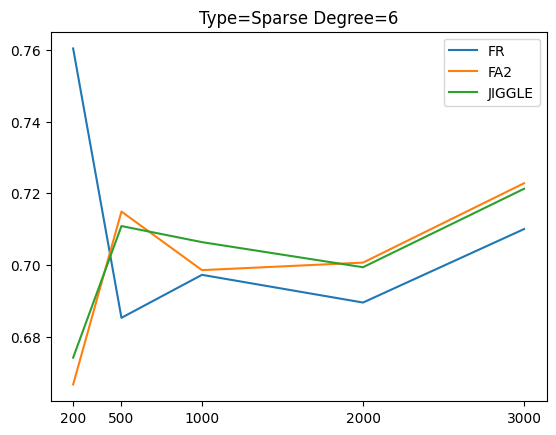

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
4   Sparse           FR          200         0.600000
5   Sparse           KK          200         0.569767
6   Sparse          FA2          200         0.500000
7   Sparse       JIGGLE          200         0.487805
24  Sparse           FR          500         0.562654
25  Sparse           KK          500         0.544474
26  Sparse          FA2          500         0.560570
27  Sparse       JIGGLE          500         0.572464
44  Sparse           FR         1000         0.519656
45  Sparse           KK         1000         0.553130
46  Sparse          FA2         1000         0.533969
47  Sparse       JIGGLE         1000         0.532934
64  Sparse           FR         2000         0.514921
65  Sparse           KK         2000         0.540691
66  Sparse          FA2         2000         0.531126
67  Sparse       JIGGLE         2000         0.542298
84  Sparse           FR         3000         0.536042
85  Sparse           KK     

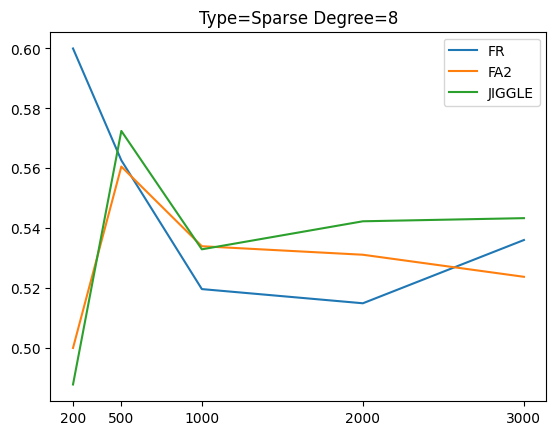

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
8   Sparse           FR          200         0.512500
9   Sparse           KK          200         0.540984
10  Sparse          FA2          200         0.381944
11  Sparse       JIGGLE          200         0.382716
28  Sparse           FR          500         0.386189
29  Sparse           KK          500         0.396450
30  Sparse          FA2          500         0.381679
31  Sparse       JIGGLE          500         0.400538
48  Sparse           FR         1000         0.384309
49  Sparse           KK         1000         0.382734
50  Sparse          FA2         1000         0.372315
51  Sparse       JIGGLE         1000         0.367816
68  Sparse           FR         2000         0.362057
69  Sparse           KK         2000         0.369037
70  Sparse          FA2         2000         0.376987
71  Sparse       JIGGLE         2000         0.356300
88  Sparse           FR         3000         0.351585
89  Sparse           KK     

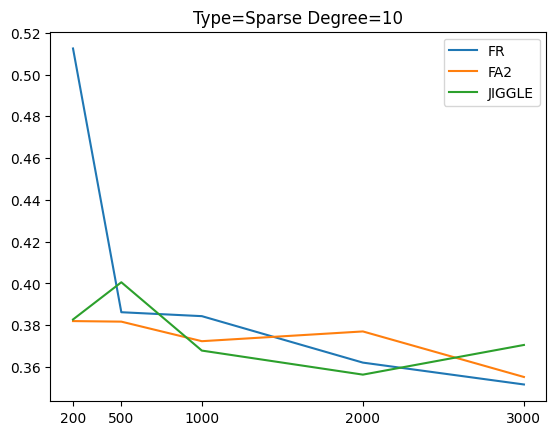

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
12  Sparse           FR          200         0.318681
13  Sparse           KK          200         0.385714
14  Sparse          FA2          200         0.300000
15  Sparse       JIGGLE          200         0.277419
32  Sparse           FR          500         0.325203
33  Sparse           KK          500         0.350000
34  Sparse          FA2          500         0.314667
35  Sparse       JIGGLE          500         0.309249
52  Sparse           FR         1000         0.254902
53  Sparse           KK         1000         0.244444
54  Sparse          FA2         1000         0.247126
55  Sparse       JIGGLE         1000         0.244186
72  Sparse           FR         2000         0.271153
73  Sparse           KK         2000         0.293310
74  Sparse          FA2         2000         0.277922
75  Sparse       JIGGLE         2000         0.272340
92  Sparse           FR         3000         0.256836
93  Sparse           KK     

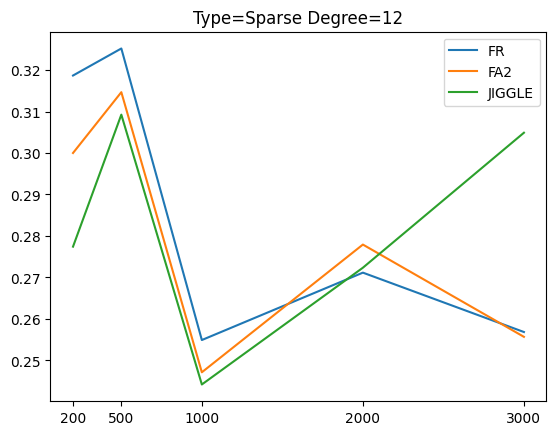

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
16  Sparse           FR          200         0.316456
17  Sparse           KK          200         0.303030
18  Sparse          FA2          200         0.226891
19  Sparse       JIGGLE          200         0.171271
36  Sparse           FR          500         0.192182
37  Sparse           KK          500         0.190141
38  Sparse          FA2          500         0.176796
39  Sparse       JIGGLE          500         0.172308
56  Sparse           FR         1000         0.226087
57  Sparse           KK         1000         0.199037
58  Sparse          FA2         1000         0.192602
59  Sparse       JIGGLE         1000         0.226331
76  Sparse           FR         2000         0.151145
77  Sparse           KK         2000         0.241379
78  Sparse          FA2         2000         0.138870
79  Sparse       JIGGLE         2000         0.163543
96  Sparse           FR         3000         0.155768
97  Sparse           KK     

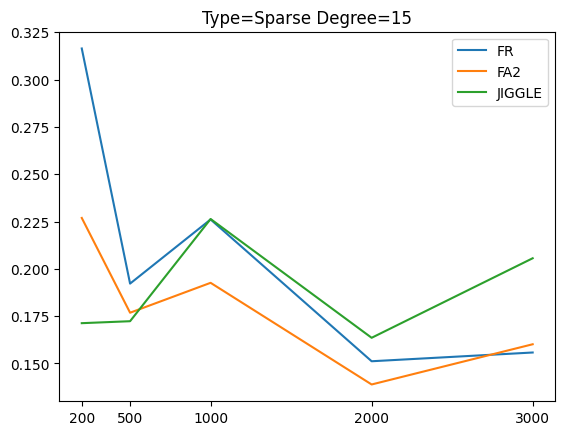

       Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Uniform           FR          200         0.689189
1   Uniform           KK          200         0.727273
2   Uniform          FA2          200         0.614907
3   Uniform       JIGGLE          200         0.611842
20  Uniform           FR          500         0.547315
21  Uniform           KK          500         0.568000
22  Uniform          FA2          500         0.593750
23  Uniform       JIGGLE          500         0.573099
40  Uniform           FR         1000         0.587079
41  Uniform           KK         1000         0.602828
42  Uniform          FA2         1000         0.595238
43  Uniform       JIGGLE         1000         0.607042
60  Uniform           FR         2000         0.587345
61  Uniform           KK         2000         0.665434
62  Uniform          FA2         2000         0.605361
63  Uniform       JIGGLE         2000         0.605563
80  Uniform           FR         3000         0.582632
81  Unifor

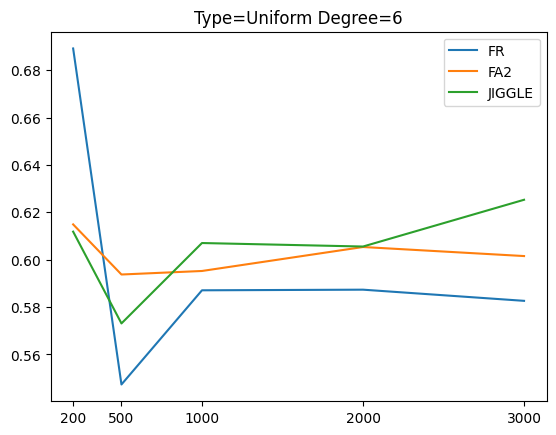

       Type FD_Algorithm Nodes_Number  TPR_Sensitivity
4   Uniform           FR          200         0.541176
5   Uniform           KK          200         0.660714
6   Uniform          FA2          200         0.328467
7   Uniform       JIGGLE          200         0.439394
24  Uniform           FR          500         0.344482
25  Uniform           KK          500         0.396887
26  Uniform          FA2          500         0.355623
27  Uniform       JIGGLE          500         0.351613
44  Uniform           FR         1000         0.287218
45  Uniform           KK         1000         0.297935
46  Uniform          FA2         1000         0.296243
47  Uniform       JIGGLE         1000         0.296763
64  Uniform           FR         2000         0.262447
65  Uniform           KK         2000         0.316539
66  Uniform          FA2         2000         0.290535
67  Uniform       JIGGLE         2000         0.296015
84  Uniform           FR         3000         0.270098
85  Unifor

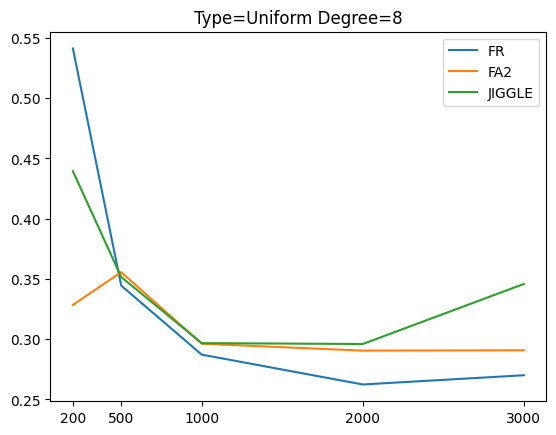

       Type FD_Algorithm Nodes_Number  TPR_Sensitivity
8   Uniform           FR          200         0.415094
9   Uniform           KK          200         0.401961
10  Uniform          FA2          200         0.306569
11  Uniform       JIGGLE          200         0.316901
28  Uniform           FR          500         0.284585
29  Uniform           KK          500         0.293617
30  Uniform          FA2          500         0.259259
31  Uniform       JIGGLE          500         0.273438
48  Uniform           FR         1000         0.176948
49  Uniform           KK         1000         0.229645
50  Uniform          FA2         1000         0.176211
51  Uniform       JIGGLE         1000         0.227451
68  Uniform           FR         2000         0.147160
69  Uniform           KK         2000         0.171118
70  Uniform          FA2         2000         0.151675
71  Uniform       JIGGLE         2000         0.141099
88  Uniform           FR         3000         0.120791
89  Unifor

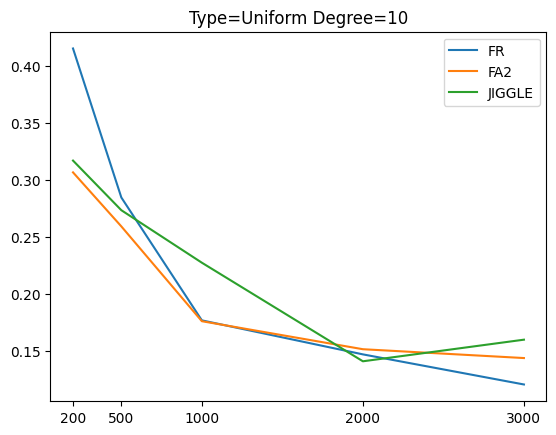

       Type FD_Algorithm Nodes_Number  TPR_Sensitivity
12  Uniform           FR          200         0.291667
13  Uniform           KK          200         0.252632
14  Uniform          FA2          200         0.196581
15  Uniform       JIGGLE          200         0.177914
32  Uniform           FR          500         0.174847
33  Uniform           KK          500         0.462963
34  Uniform          FA2          500         0.202749
35  Uniform       JIGGLE          500         0.256881
52  Uniform           FR         1000         0.156364
53  Uniform           KK         1000         0.174349
54  Uniform          FA2         1000         0.170923
55  Uniform       JIGGLE         1000         0.164207
72  Uniform           FR         2000         0.111011
73  Uniform           KK         2000         0.168848
74  Uniform          FA2         2000         0.113488
75  Uniform       JIGGLE         2000         0.104101
92  Uniform           FR         3000         0.087095
93  Unifor

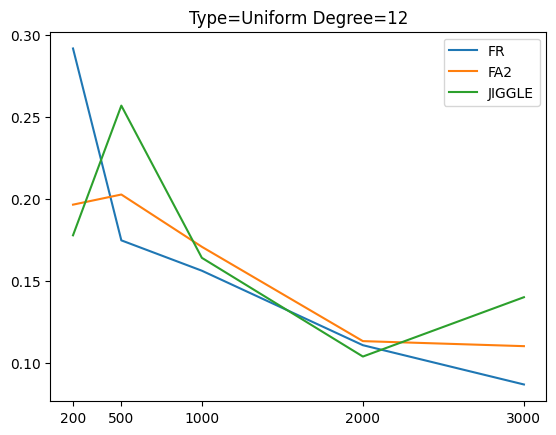

       Type FD_Algorithm Nodes_Number  TPR_Sensitivity
16  Uniform           FR          200         0.346154
17  Uniform           KK          200         0.341176
18  Uniform          FA2          200         0.350649
19  Uniform       JIGGLE          200         0.157068
36  Uniform           FR          500         0.131098
37  Uniform           KK          500         0.192000
38  Uniform          FA2          500         0.308725
39  Uniform       JIGGLE          500         0.500000
56  Uniform           FR         1000         0.119380
57  Uniform           KK         1000         0.157563
58  Uniform          FA2         1000         0.136602
59  Uniform       JIGGLE         1000         0.167382
76  Uniform           FR         2000         0.100849
77  Uniform           KK         2000         0.148252
78  Uniform          FA2         2000         0.100095
79  Uniform       JIGGLE         2000         0.126812
96  Uniform           FR         3000         0.071466
97  Unifor

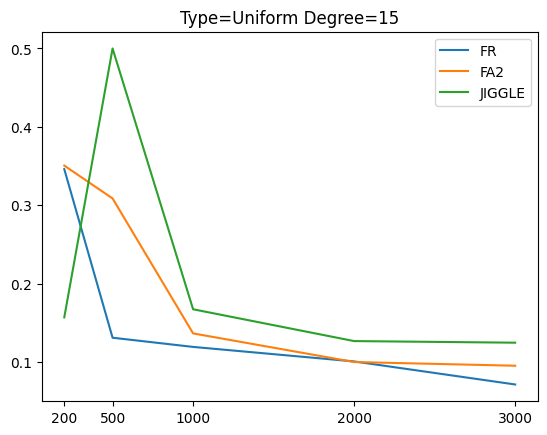

In [31]:
drawSensitivityGraphWithSameDegree('Sparse', 6, df_sparse_splitted)
drawSensitivityGraphWithSameDegree('Sparse', 8, df_sparse_splitted)
drawSensitivityGraphWithSameDegree('Sparse', 10, df_sparse_splitted)
drawSensitivityGraphWithSameDegree('Sparse', 12, df_sparse_splitted)
drawSensitivityGraphWithSameDegree('Sparse', 15, df_sparse_splitted)
drawSensitivityGraphWithSameDegree('Uniform', 6, df_uniform_splitted)
drawSensitivityGraphWithSameDegree('Uniform', 8, df_uniform_splitted)
drawSensitivityGraphWithSameDegree('Uniform', 10, df_uniform_splitted)
drawSensitivityGraphWithSameDegree('Uniform', 12, df_uniform_splitted)
drawSensitivityGraphWithSameDegree('Uniform', 15, df_uniform_splitted)

# drawSpecificityGraphWithSameDegree('Sparse', 6, df_sparse_splitted)
# drawSpecificityGraphWithSameDegree('Sparse', 8, df_sparse_splitted)
# drawSpecificityGraphWithSameDegree('Sparse', 10, df_sparse_splitted)
# drawSpecificityGraphWithSameDegree('Sparse', 12, df_sparse_splitted)
# drawSpecificityGraphWithSameDegree('Sparse', 15, df_sparse_splitted)
# drawSpecificityGraphWithSameDegree('Uniform', 6, df_uniform_splitted)
# drawSpecificityGraphWithSameDegree('Uniform', 8, df_uniform_splitted)
# drawSpecificityGraphWithSameDegree('Uniform', 10, df_uniform_splitted)
# drawSpecificityGraphWithSameDegree('Uniform', 12, df_uniform_splitted)
# drawSpecificityGraphWithSameDegree('Uniform', 15, df_uniform_splitted)